# 📊 Edge Caching Simulation — Analysis & Plots

This notebook visualizes the results of the Future Networks CDN caching simulation.
We generate plots for:

- Cache size sweep  
- Zipf exponent sweep  
- Edge count sweep  
- Policy comparisons  

Metrics include:
- Cache hit ratio  
- Average latency  
- 95th percentile latency  
- Origin load  


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [137]:
cache_df = pd.read_csv("results/cache_size_results.csv")
zipf_df = pd.read_csv("results/zipf_results.csv")
edge_df = pd.read_csv("results/edge_count_results.csv")

cache_df, zipf_df, edge_df


(    cache_size   policy  hit_ratio  avg_latency  p95_latency  origin_load
 0           20      LRU   0.317195     71.45245          100     136561.0
 1           20      LFU   0.398780     64.10980          100     120244.0
 2           20   RANDOM   0.269615     75.73465          100     146077.0
 3            0  NOCACHE   0.000000    100.00000          100     200000.0
 4           50      LRU   0.463740     58.26340          100     107252.0
 5           50      LFU   0.503805     54.65755          100      99239.0
 6           50   RANDOM   0.407810     63.29710          100     118438.0
 7            0  NOCACHE   0.000000    100.00000          100     200000.0
 8          100      LRU   0.578220     47.96020          100      84356.0
 9          100      LFU   0.568910     48.79810          100      86218.0
 10         100   RANDOM   0.522445     52.97995          100      95511.0
 11           0  NOCACHE   0.000000    100.00000          100     200000.0
 12         200      LRU 

## SECTION A: CACHE SIZE PLOTS

## Hit Ratio vs Cache Size

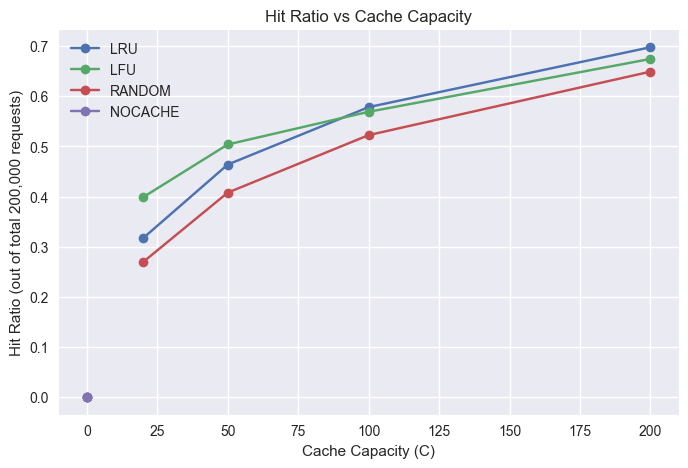

In [ ]:
plt.figure(figsize=(8,5))
for pol in cache_df["policy"].unique():
    sub = cache_df[cache_df["policy"] == pol]
    plt.plot(sub["cache_size"], sub["hit_ratio"], marker="o", label=pol)

plt.xlabel("Cache Capacity (C)")
plt.ylabel("Hit Ratio (out of total 200,000 requests)")
plt.title("Hit Ratio vs Cache Capacity")
plt.legend()
plt.grid(True)
plt.show()
# 3nu bir birinin yaninda goster

## Average Latency vs Cache Size

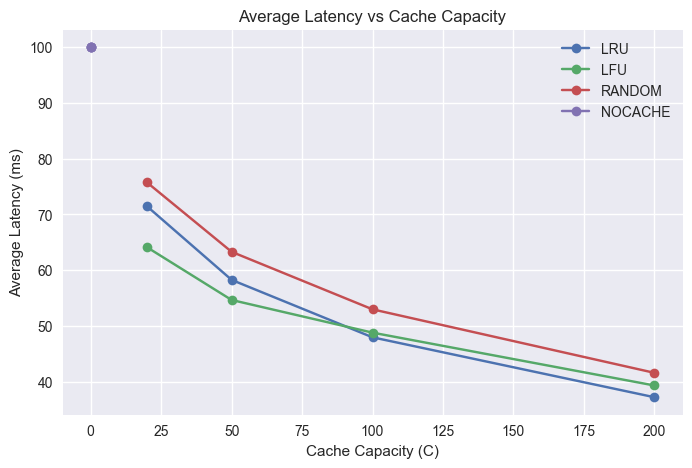

In [154]:
plt.figure(figsize=(8,5))
for pol in cache_df["policy"].unique():
    sub = cache_df[cache_df["policy"] == pol]
    plt.plot(sub["cache_size"], sub["avg_latency"], marker="o", label=pol)

plt.xlabel("Cache Capacity (C)")
plt.ylabel("Average Latency (ms)")
plt.title("Average Latency vs Cache Capacity")
plt.legend()
plt.grid(True)
plt.show()


## Origin Load vs Cache Size

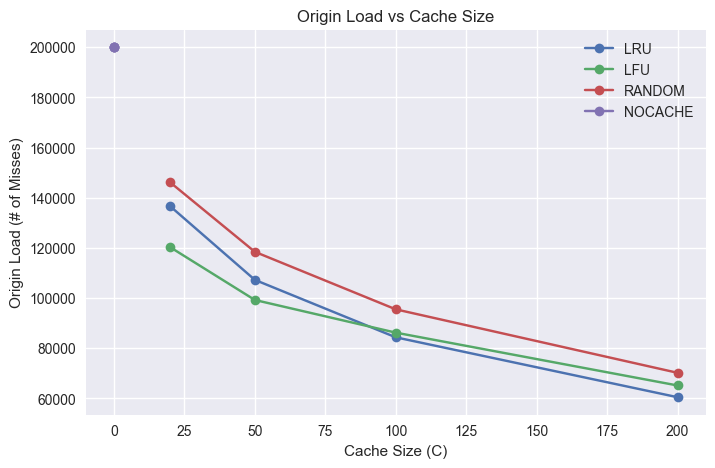

In [140]:
plt.figure(figsize=(8,5))
for pol in cache_df["policy"].unique():
    sub = cache_df[cache_df["policy"] == pol]
    plt.plot(sub["cache_size"], sub["origin_load"], marker="o", label=pol)

plt.xlabel("Cache Size (C)")
plt.ylabel("Origin Load (# of Misses)")
plt.title("Origin Load vs Cache Size")
plt.legend()
plt.grid(True)
plt.show()


## Bar Chart: Hit Ratio per Policy per Cache Size

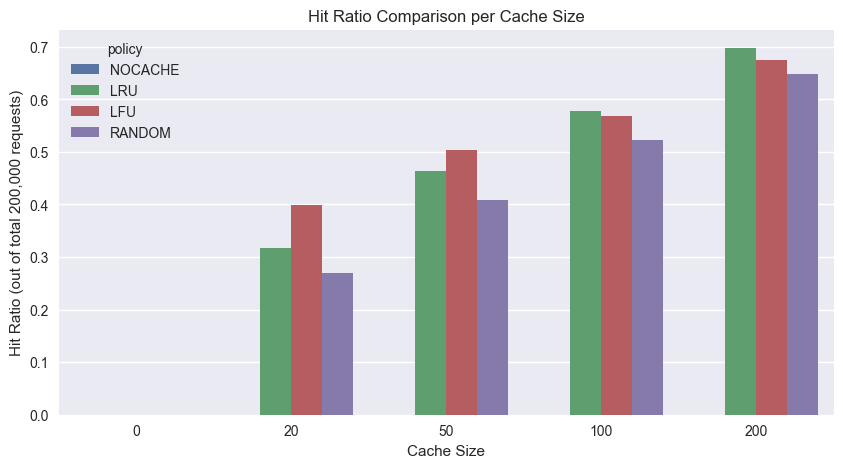

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=cache_df, x="cache_size", y="hit_ratio", hue="policy")
plt.title("Hit Ratio Comparison per Cache Size")
plt.ylabel("Hit Ratio (out of total 200,000 requests)")
plt.xlabel("Cache Size")
plt.show()
# dont show

## Scatter: Hit Ratio vs Latency

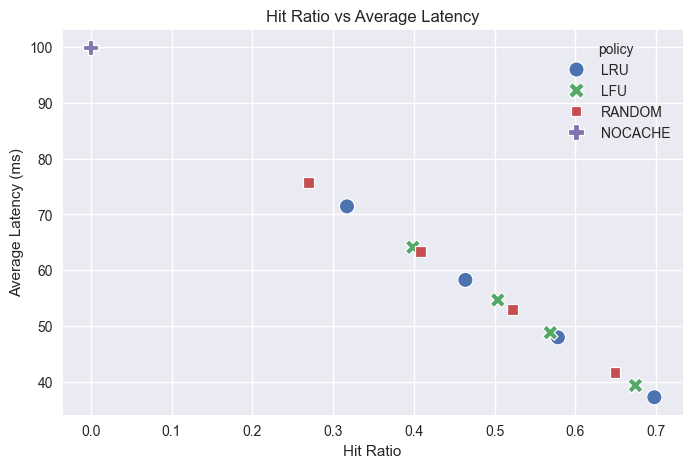

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cache_df, x="hit_ratio", y="avg_latency", hue="policy", style="policy", s=120)
plt.title("Hit Ratio vs Average Latency")
plt.xlabel("Hit Ratio")
plt.ylabel("Average Latency (ms)")
plt.grid(True)
plt.show()
# put this

# ZIPF EXPERIMENTS

## Hit Ratio vs Alpha

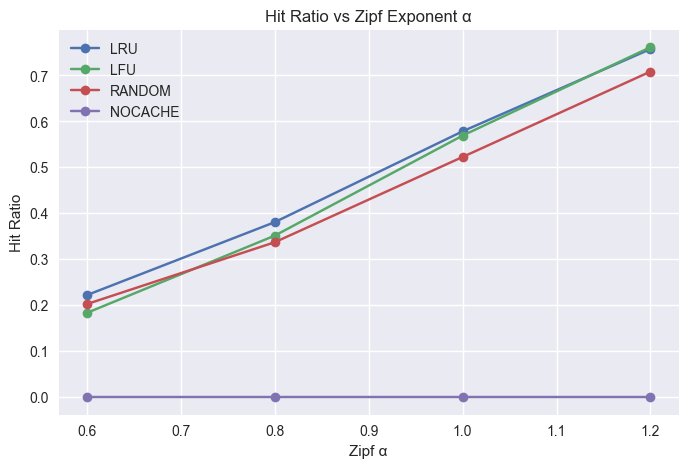

In [ ]:
plt.figure(figsize=(8,5))
for pol in zipf_df["policy"].unique():
    sub = zipf_df[zipf_df["policy"] == pol]
    plt.plot(sub["alpha"], sub["hit_ratio"], marker="o", label=pol)

plt.xlabel("Zipf α")
plt.ylabel("Hit Ratio")
plt.title("Hit Ratio vs Zipf Exponent α")
plt.legend()
plt.grid(True)
plt.show()
# keep two, exclude origin load

## Average Latency vs Alpha

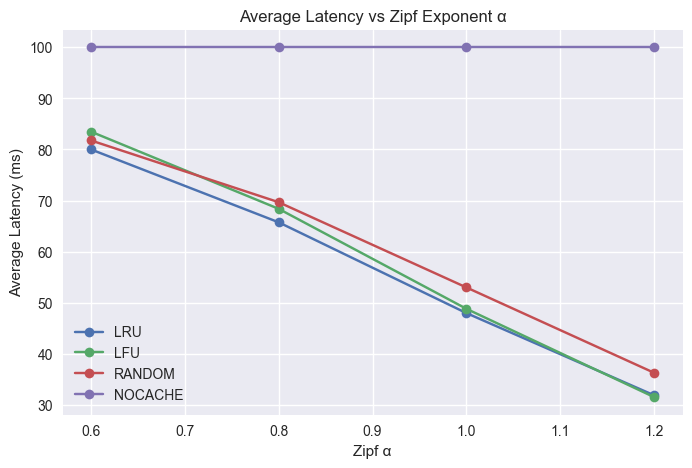

In [144]:
plt.figure(figsize=(8,5))
for pol in zipf_df["policy"].unique():
    sub = zipf_df[zipf_df["policy"] == pol]
    plt.plot(sub["alpha"], sub["avg_latency"], marker="o", label=pol)

plt.xlabel("Zipf α")
plt.ylabel("Average Latency (ms)")
plt.title("Average Latency vs Zipf Exponent α")
plt.legend()
plt.grid(True)
plt.show()


## Origin Load vs Alpha

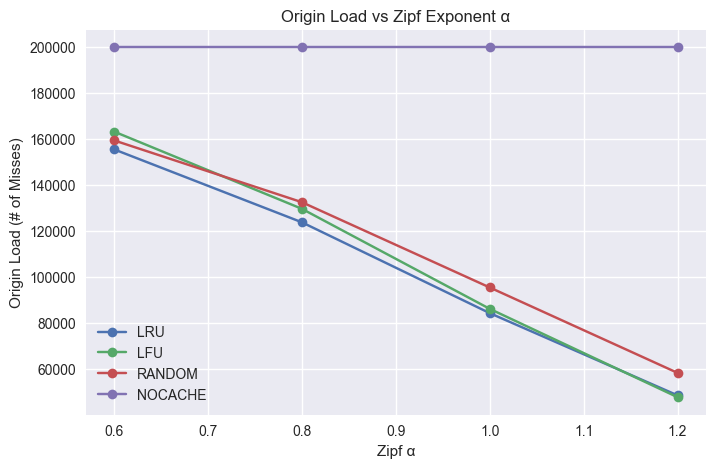

In [ ]:
plt.figure(figsize=(8,5))
for pol in zipf_df["policy"].unique():
    sub = zipf_df[zipf_df["policy"] == pol]
    plt.plot(sub["alpha"], sub["origin_load"], marker="o", label=pol)

plt.xlabel("Zipf α")
plt.ylabel("Origin Load (# of Misses)")
plt.title("Origin Load vs Zipf Exponent α")
plt.legend()
plt.grid(True)
plt.show()
# remove

## Bar Chart per Alpha

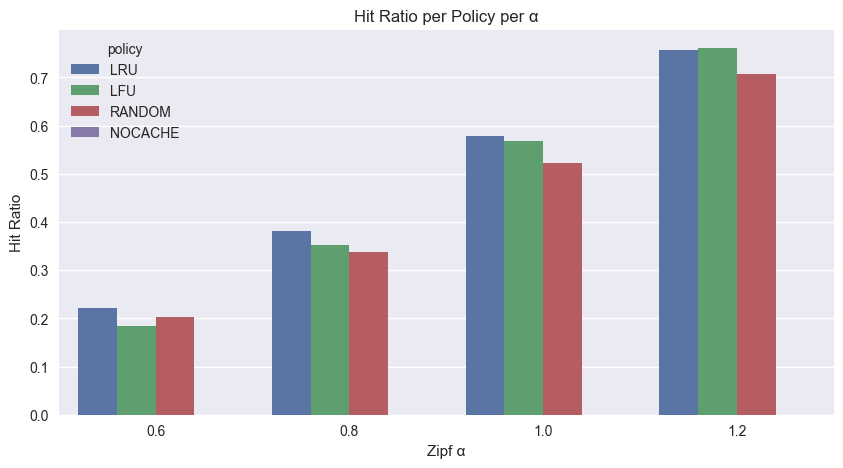

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=zipf_df, x="alpha", y="hit_ratio", hue="policy")
plt.title("Hit Ratio per Policy per α")
plt.ylabel("Hit Ratio")
plt.xlabel("Zipf α")
plt.show()
# show this as a better version of first graph

# SECTION C: EDGE COUNT EXPERIMENTS

## Hit Ratio vs Number of Edges

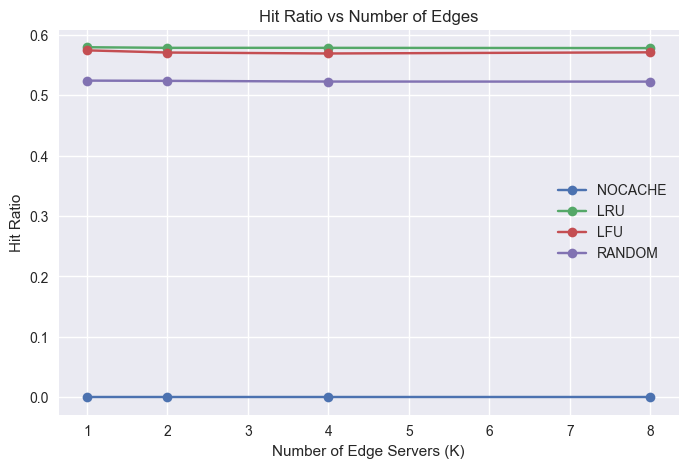

In [ ]:
plt.figure(figsize=(8,5))

for pol in edge_df["policy"].unique():
    sub = edge_df[edge_df["policy"] == pol]
    plt.plot(sub["n_edges"], sub["hit_ratio"], marker="o", label=pol)

plt.xlabel("Number of Edge Servers (K)")
plt.ylabel("Hit Ratio")
plt.title("Hit Ratio vs Number of Edges")
plt.legend()
plt.grid(True)
plt.show()
# 3u yan yana

## Avg Latency vs Number of Edges

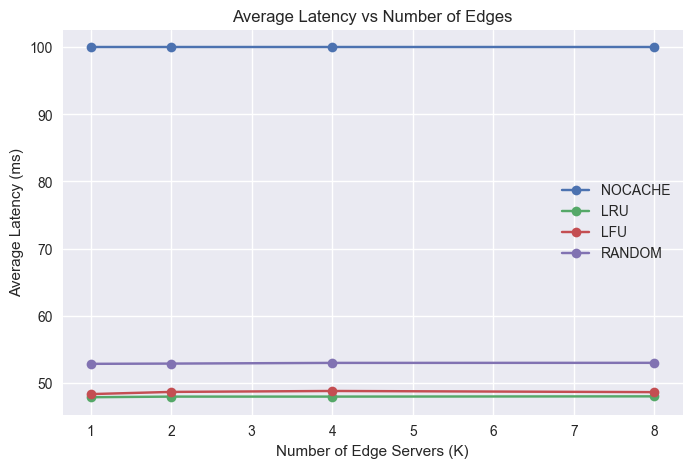

In [148]:
plt.figure(figsize=(8,5))

for pol in edge_df["policy"].unique():
    sub = edge_df[edge_df["policy"] == pol]
    plt.plot(sub["n_edges"], sub["avg_latency"], marker="o", label=pol)

plt.xlabel("Number of Edge Servers (K)")
plt.ylabel("Average Latency (ms)")
plt.title("Average Latency vs Number of Edges")
plt.grid(True)
plt.legend()
plt.show()


## Origin Load vs Number of Edges

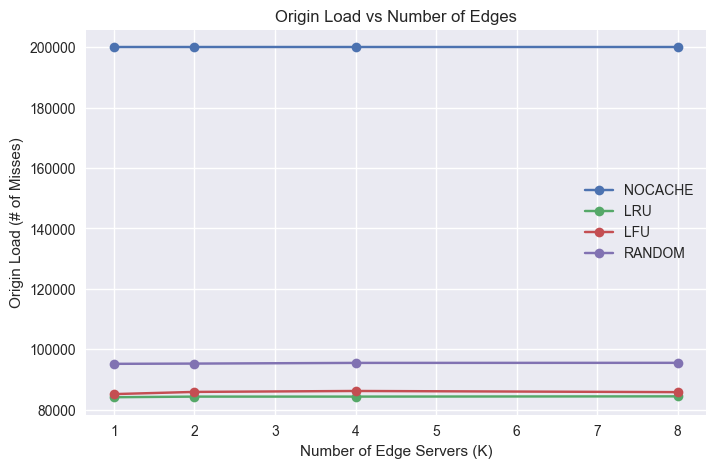

In [149]:
plt.figure(figsize=(8,5))

for pol in edge_df["policy"].unique():
    sub = edge_df[edge_df["policy"] == pol]
    plt.plot(sub["n_edges"], sub["origin_load"], marker="o", label=pol)

plt.xlabel("Number of Edge Servers (K)")
plt.ylabel("Origin Load (# of Misses)")
plt.title("Origin Load vs Number of Edges")
plt.grid(True)
plt.legend()
plt.show()


# SECTION D: COMBINED ANALYSIS

## Hit Ratio Comparison Heatmap (Policy × α)

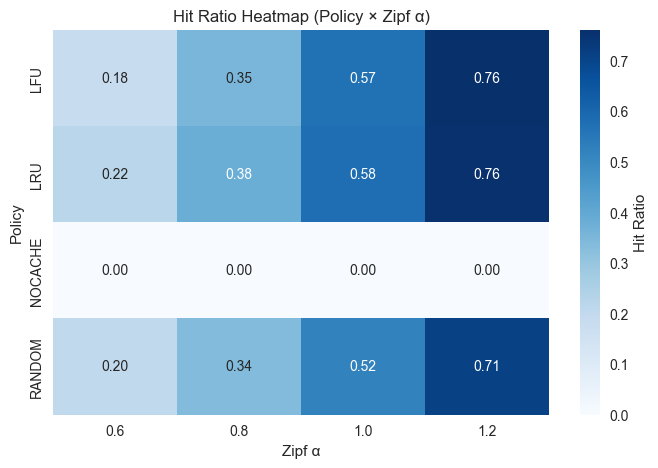

In [ ]:
pivot = zipf_df.pivot(index="policy", columns="alpha", values="hit_ratio")

plt.figure(figsize=(8,5))
ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Hit Ratio Heatmap (Policy × Zipf α)")
plt.xlabel("Zipf α")
plt.ylabel("Policy")

# Add colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label("Hit Ratio")

plt.show()
# good. no cache last row

## Latency Comparison Heatmap

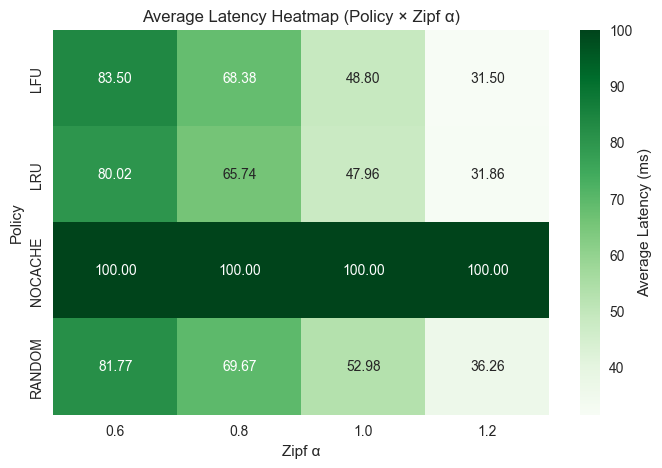

In [ ]:
pivot = zipf_df.pivot(index="policy", columns="alpha", values="avg_latency")

plt.figure(figsize=(8,5))
ax = sns.heatmap(pivot, annot=True, cmap="Greens", fmt=".2f")
plt.title("Average Latency Heatmap (Policy × Zipf α)")
plt.xlabel("Zipf α")
plt.ylabel("Policy")

# Colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label("Average Latency (ms)")

plt.show()
# good. no cache last row